<a href="https://colab.research.google.com/github/fahriyegrl/bitcoin_predict_time_series_tensorflow/blob/main/bitcoin_prediction_time_series_forecasting_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting and downloading then Bitcoin historical data from here: https://coincodex.com/crypto/bitcoin/historical-data/

In [182]:
!wget https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv

--2024-09-16 17:18:36--  https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv [following]
--2024-09-16 17:18:36--  https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204004 (199K) [text/plain]
Saving to: ‘bitcoin_2019-08-26_2024-08-24.csv.1’

bitcoin_2019-08-26_ 100%[==================

In [183]:
import pandas as pd

df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv')
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
1,2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2,2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
3,2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
4,2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [184]:
df.tail()

,Start,End,Open,High,Low,Close,Volume,Market Cap
1820,2019-08-30,2019-08-31,9499.878802,9640.946925,9409.399994,9582.255358,1.614085e+10,1.709868e+11
1821,2019-08-29,2019-08-30,9755.839220,9755.839220,9388.612159,9493.755389,2.061784e+10,1.707816e+11
1822,2019-08-28,2019-08-29,10206.418980,10270.522245,9691.877126,9759.791528,1.522129e+10,1.803473e+11
1823,2019-08-27,2019-08-28,10380.720317,10380.720317,10090.229211,10219.413373,1.570331e+10,1.826662e+11
1824,2019-08-26,2019-08-27,10150.617721,10556.072516,10150.617721,10374.876617,1.716487e+10,1.852813e+11


In [185]:
df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv',
                 parse_dates=['Start'],
                 index_col= ['Start'])
df.head()

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2024-08-23 to 2019-08-26
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   End         1825 non-null   object 
 1   Open        1825 non-null   float64
 2   High        1825 non-null   float64
 3   Low         1825 non-null   float64
 4   Close       1825 non-null   float64
 5   Volume      1825 non-null   float64
 6   Market Cap  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 114.1+ KB


In [187]:
len(df)

1825

In [188]:
bitcoin_price_reversed = df.iloc[::-1]
bitcoin_price = pd.DataFrame(bitcoin_price_reversed['Close']).rename(columns={'Close':'price'})
bitcoin_price.head()

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [189]:
bitcoin_price.index.dtype

dtype('<M8[ns]')

In [190]:
len(bitcoin_price), bitcoin_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2019-08-26 to 2024-08-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


(1825, None)

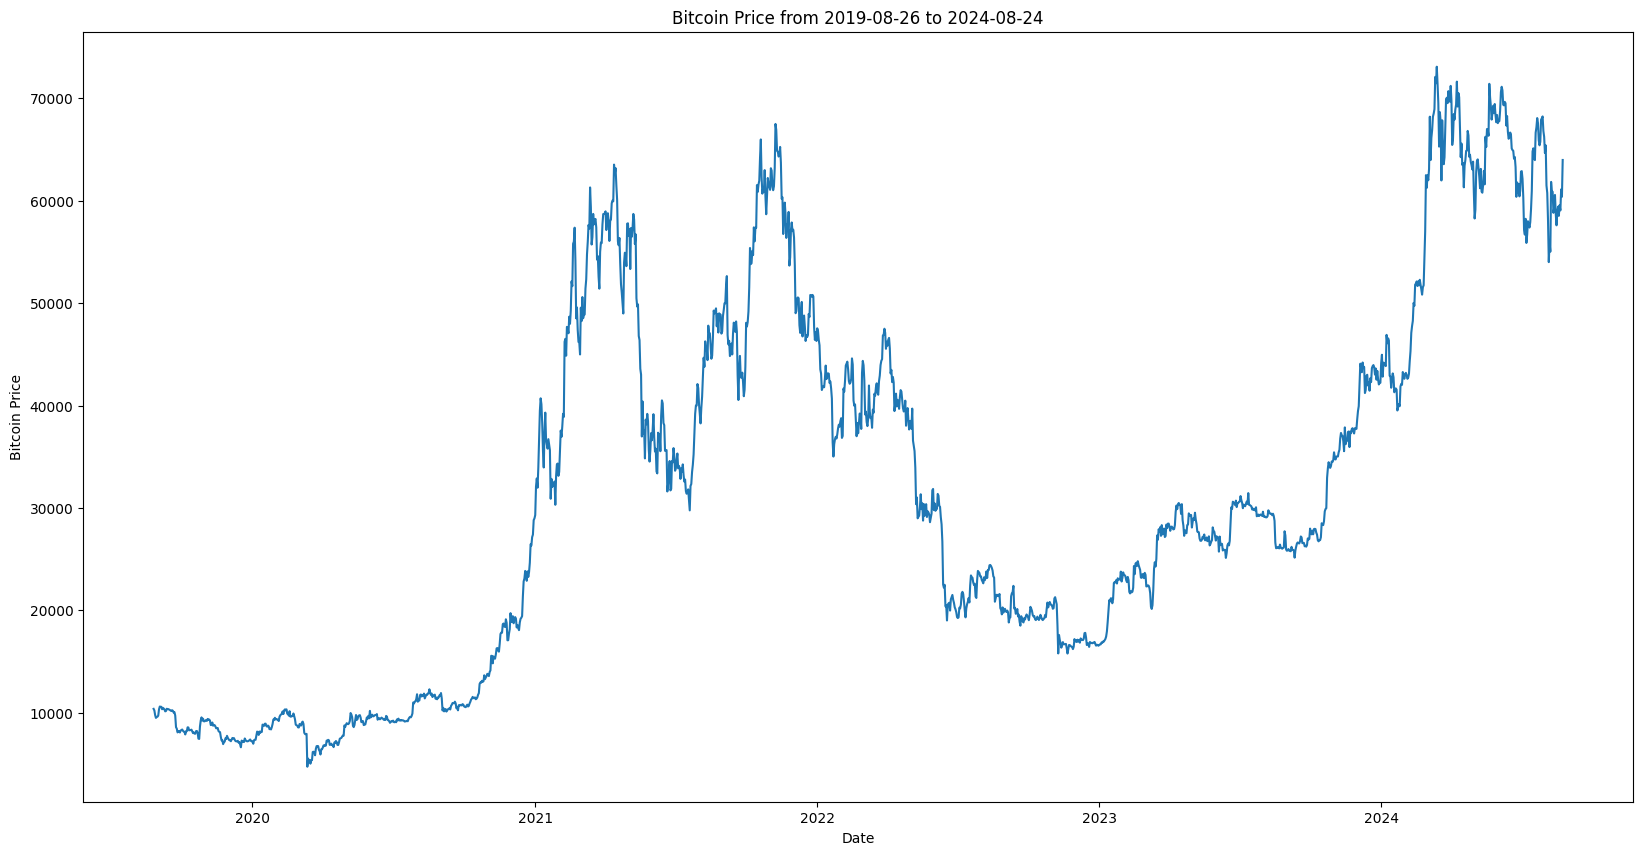

In [191]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(bitcoin_price)
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [192]:
bitcoin_price[:5]

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [193]:
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price['price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2019-08-26T00:00:00.000000000', '2019-08-27T00:00:00.000000000',
        '2019-08-28T00:00:00.000000000', '2019-08-29T00:00:00.000000000',
        '2019-08-30T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778]))

In [194]:
split = int(len(prices)  * 0.8)
split

1460

In [195]:
from os import X_OK
## Creating train and test datasets

# split = int(len(bitcoin_price)  * 0.8)
# split

X_train, y_train = timesteps[:split], prices[:split]
X_test, y_test = timesteps[split:], prices[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1460, 1460, 365, 365)

In [196]:
X_test.shape

(365,)

In [197]:
timesteps[:1]

array(['2019-08-26T00:00:00.000000000'], dtype='datetime64[ns]')

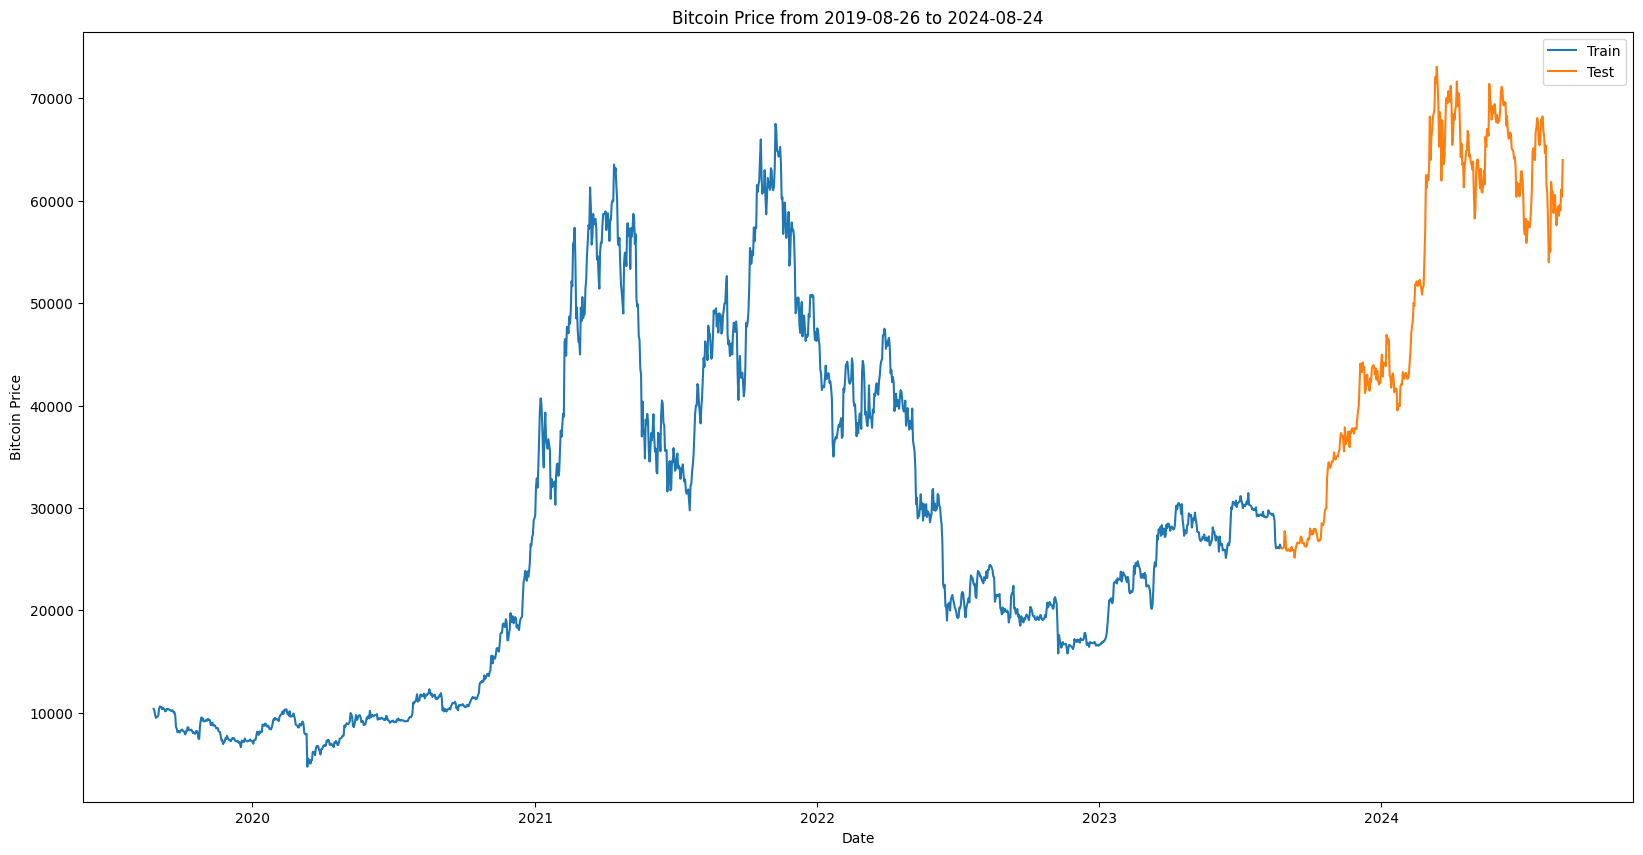

In [198]:
plt.figure(figsize=(20,10))
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.legend(['Train', 'Test'])
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [199]:
## plot time series function to use later

def plot_time_series(timesteps, values, start=0, end=None, label=None ):

  plt.plot(timesteps[start:end], values[start:end])
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend([label])
  plt.grid(True)

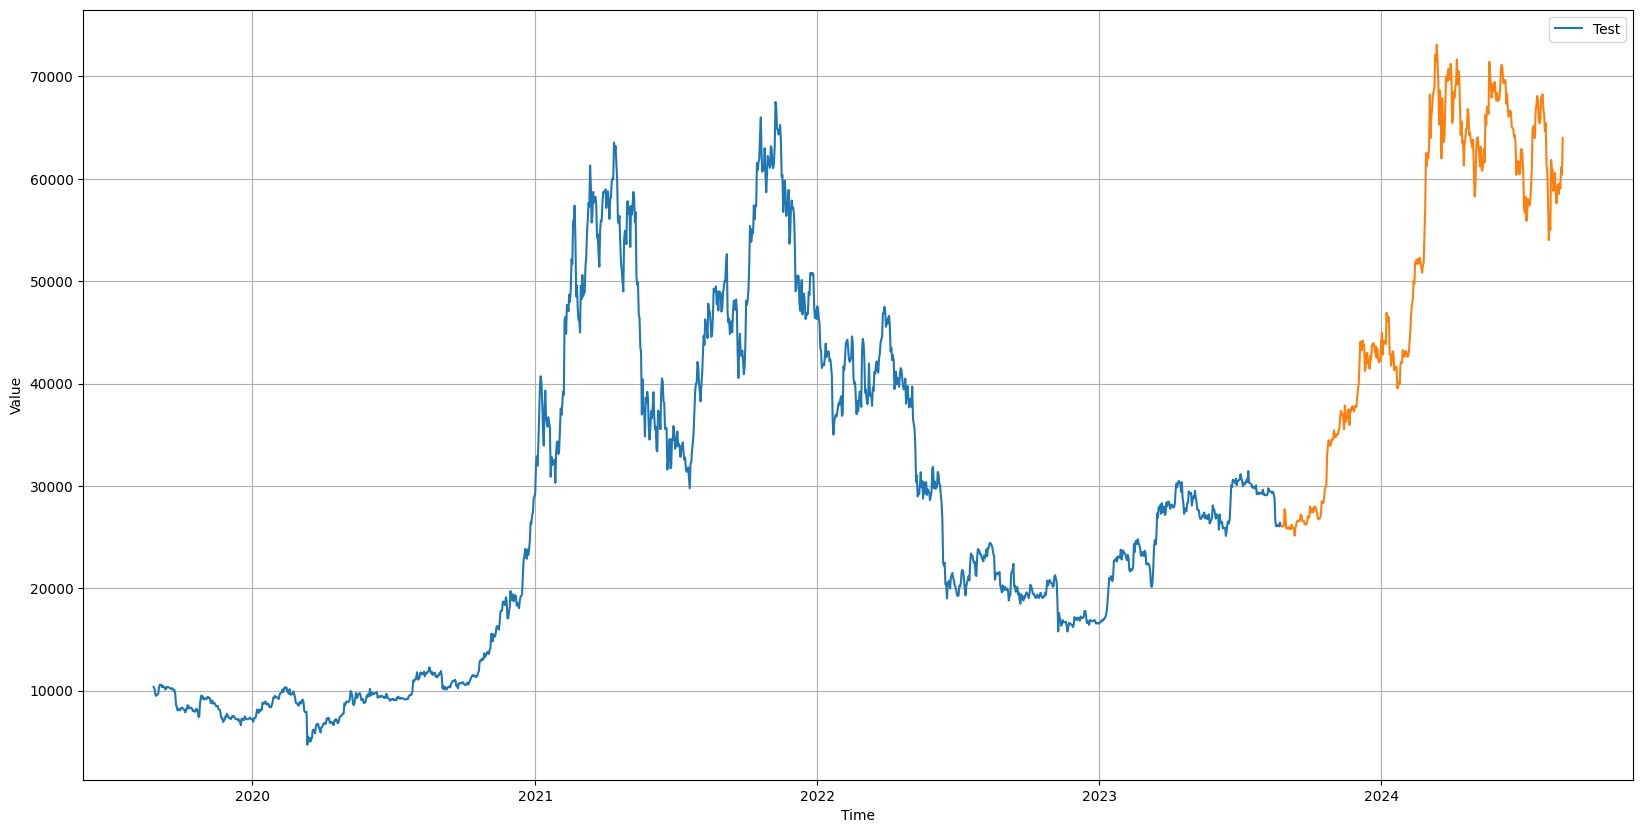

In [200]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_train, values = y_train, label='Train')
plot_time_series(timesteps=X_test, values = y_test, label='Test')

In [201]:
## Model 1: In this model, the prediction at time will be the value at time-1.

#

base_forecast = y_test[:-1]
base_forecast[:10]

array([26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
       25936.45, 25816.57, 25856.93, 25980.6 ])

In [202]:
y_test[:10]

array([26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
       25936.45, 25816.57, 25856.93, 25980.6 ])

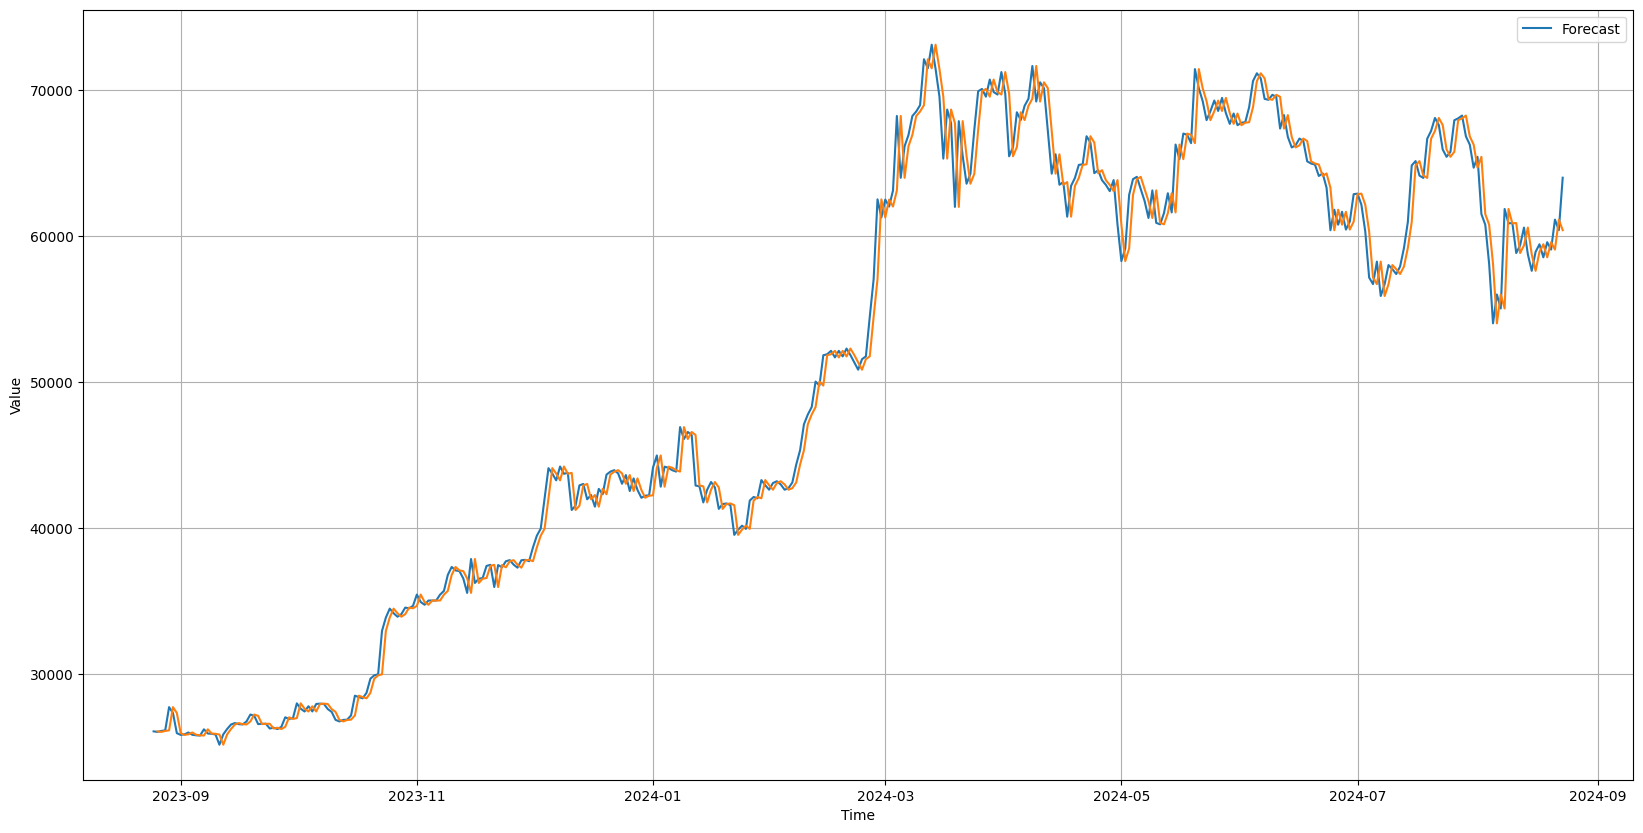

In [203]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_test, values = y_test, label='Test')
plot_time_series(timesteps=X_test[1:], values = base_forecast, label='Forecast')

In [204]:
import tensorflow as tf


#Regression metrics (which can also be used for time series forecasting):  lower is better.

# MAE - mean absolute error
# MSE - mean squared error
# RMSE - root mean square error
# MAPE/sMAPE - (symmetric) mean absolute percentage error


def evaluation(y_true, y_pred):

  mae_metric = tf.keras.metrics.MeanAbsoluteError()
  mae= mae_metric(y_true, y_pred)

  mse_metric = tf.keras.metrics.MeanSquaredError()
  mse = mse_metric(y_true, y_pred)

  rmse = tf.sqrt(mse)


  mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()
  mape = mape_metric(y_true, y_pred)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "mape": mape.numpy()}


In [205]:
_base_forecast_evaluation = evaluation(y_test[1:], base_forecast)
_base_forecast_evaluation

{'mae': 996.01025, 'mse': 2205020.5, 'mape': 1.8600316}

In [206]:
## Updating the datasets to WINDOW and HORIZON

HORIZON = 1 # to predict one/next day
WINDOW = 7 # use the past seven days to predict Horizon


 ## Just trial on small data
def get_label_window(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]

In [207]:
tf.range(8)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)>

In [208]:
fake_window, fake_label =  get_label_window(tf.expand_dims(tf.range(8), axis=0))
tf.squeeze(fake_window).numpy, tf.squeeze(fake_label).numpy

(<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>>,
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=7>>)

In [209]:
import numpy as np

window_size = 7
horizon = 1

window_step = window_size + horizon

np.arange(window_size + horizon)

window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)  ## 2D
window_step

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [210]:
prices[:10], len(prices)

(array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157,
        10603.09546299, 10578.32020957]),
 1825)

In [211]:
window_index = window_step + np.expand_dims(np.arange(len(prices[:14]) - (window_size + horizon) - 1), axis=0).T

window_index

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11]])

In [212]:
windows = prices[:14][window_index]
windows

array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157],
       [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
         9609.78764737,  9716.72190969, 10329.85905157, 10603.09546299],
       [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
         9716.72190969, 10329.85905157, 10603.09546299, 10578.32020957],
       [ 9493.75538921,  9582.25535778,  9609.78764737,  9716.72190969,
        10329.85905157, 10603.09546299, 10578.32020957, 10574.499542  ],
       [ 9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157,
        10603.09546299, 10578.32020957, 10574.499542  , 10339.45563157]])

In [213]:
## Bitcoinn prices = turn them to (Window, Horizon) 2D array

def make_windows(x, window_size= WINDOW, horizon=HORIZON):

  window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)

  window_index = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T

  windows = x[window_index]

  window, label = get_label_window(windows, horizon= horizon)

  return window, label

In [214]:
len(prices)

1825

In [215]:
all_windows, all_labels = make_windows(prices,window_size=window_size,horizon=horizon )

len(all_windows), len(all_labels)

(1818, 1818)

In [216]:
all_windows[1].shape, all_labels[1].shape

((7,), (1,))

In [217]:
for i in range(5):
  print(all_windows[i], all_labels[i])

[10374.87661724 10219.41337325  9759.79152841  9493.75538921
  9582.25535778  9609.78764737  9716.72190969] [10329.85905157]
[10219.41337325  9759.79152841  9493.75538921  9582.25535778
  9609.78764737  9716.72190969 10329.85905157] [10603.09546299]
[ 9759.79152841  9493.75538921  9582.25535778  9609.78764737
  9716.72190969 10329.85905157 10603.09546299] [10578.32020957]
[ 9493.75538921  9582.25535778  9609.78764737  9716.72190969
 10329.85905157 10603.09546299 10578.32020957] [10574.499542]
[ 9582.25535778  9609.78764737  9716.72190969 10329.85905157
 10603.09546299 10578.32020957 10574.499542  ] [10339.45563157]


In [218]:
### Getiing Test and Train Data

split = int(len(prices)  * 0.8)


X_train, y_train = all_windows[:split], all_labels[:split]
X_test, y_test = all_windows[split:], all_labels[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1460, 1460, 358, 358)

In [219]:
split

1460

In [220]:
len(all_windows), len(all_labels)


(1818, 1818)

In [221]:
X_train[:3], y_train[:3]

(array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
          9582.25535778,  9609.78764737,  9716.72190969],
        [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
          9609.78764737,  9716.72190969, 10329.85905157],
        [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
          9716.72190969, 10329.85905157, 10603.09546299]]),
 array([[10329.85905157],
        [10603.09546299],
        [10578.32020957]]))

In [222]:
X_test[:3], y_test[:3]

(array([[26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
         25936.45],
        [26021.02, 26088.38, 26127.89, 27718.23, 27316.23, 25936.45,
         25816.57],
        [26088.38, 26127.89, 27718.23, 27316.23, 25936.45, 25816.57,
         25856.93]]),
 array([[25816.57],
        [25856.93],
        [25980.6 ]]))

In [223]:
## Create a checkpoint callback

import os

def checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name + ".keras"),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

In [224]:
## Model 2: with single dense layer (window=7, horizon=1), Adam opt, MAE loss function
from tensorflow.keras import layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[checkpoint(model_name="model_2.name")])


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 32169.2695 - mae: 32169.2695 - mse: 1432065664.0000 - val_loss: 25082.1641 - val_mae: 25082.1641 - val_mse: 684762560.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7672.6362 - mae: 7672.6362 - mse: 101452688.0000 - val_loss: 9257.8672 - val_mae: 9257.8672 - val_mse: 102627728.0000
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3759.7422 - mae: 3759.7422 - mse: 24550380.0000 - val_loss: 4504.0723 - val_mae: 4504.0723 - val_mse: 26941434.0000
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1975.9224 - mae: 1975.9224 - mse: 7835410.5000 - val_loss: 2204.0684 - val_mae: 2204.0684 - val_mse: 8845258.0000
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1354.3630 - mae: 1354.3630 - mse: 4368694.5000 - val_loss: 1835.0167 - val_mae: 1835.0167 - val_mse: 6436801.0000
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1296.1615 - mae: 1296.1615 - mse: 4089296.0000 - val_loss: 1

In [225]:
model_2.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 776.8607 - mae: 776.8607 - mse: 1497508.8750


[1037.75732421875, 1037.75732421875, 2342178.5]

In [226]:
## Loading the best model

model_2 = tf.keras.models.load_model("model_experiments/model_2.name.keras")
model_2.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 776.8607 - mae: 776.8607 - mse: 1497508.8750


[1037.75732421875, 1037.75732421875, 2342178.5]

In [227]:
## Make a prediction

forecast = model_2.predict(X_test)
forecast.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(358, 1)

In [228]:
forecast[:10]

array([[25924.71 ],
       [25725.848],
       [25762.322],
       [25675.328],
       [25675.379],
       [25665.637],
       [25651.297],
       [25984.982],
       [25839.877],
       [25719.059]], dtype=float32)

In [229]:
X_test.shape

(358, 7)

In [230]:
tf.squeeze(X_test).shape

TensorShape([358, 7])

In [231]:
model_2_evaluation = evaluation(y_test, forecast)
model_2_evaluation

{'mae': 1037.7573, 'mse': 2342178.5, 'mape': 1.9451556}

In [232]:
_base_forecast_evaluation

{'mae': 996.01025, 'mse': 2205020.5, 'mape': 1.8600316}

In [233]:
timesteps[:1]

array(['2019-08-26T00:00:00.000000000'], dtype='datetime64[ns]')

In [234]:
len(timesteps[1:])

1824

In [235]:
len(X_test), len(X_train), len(y_test), len(timesteps)

(358, 1460, 358, 1825)

In [236]:
X_test.shape

(358, 7)

In [237]:
timesteps.shape, bitcoin_price.shape

((1825,), (1825, 1))

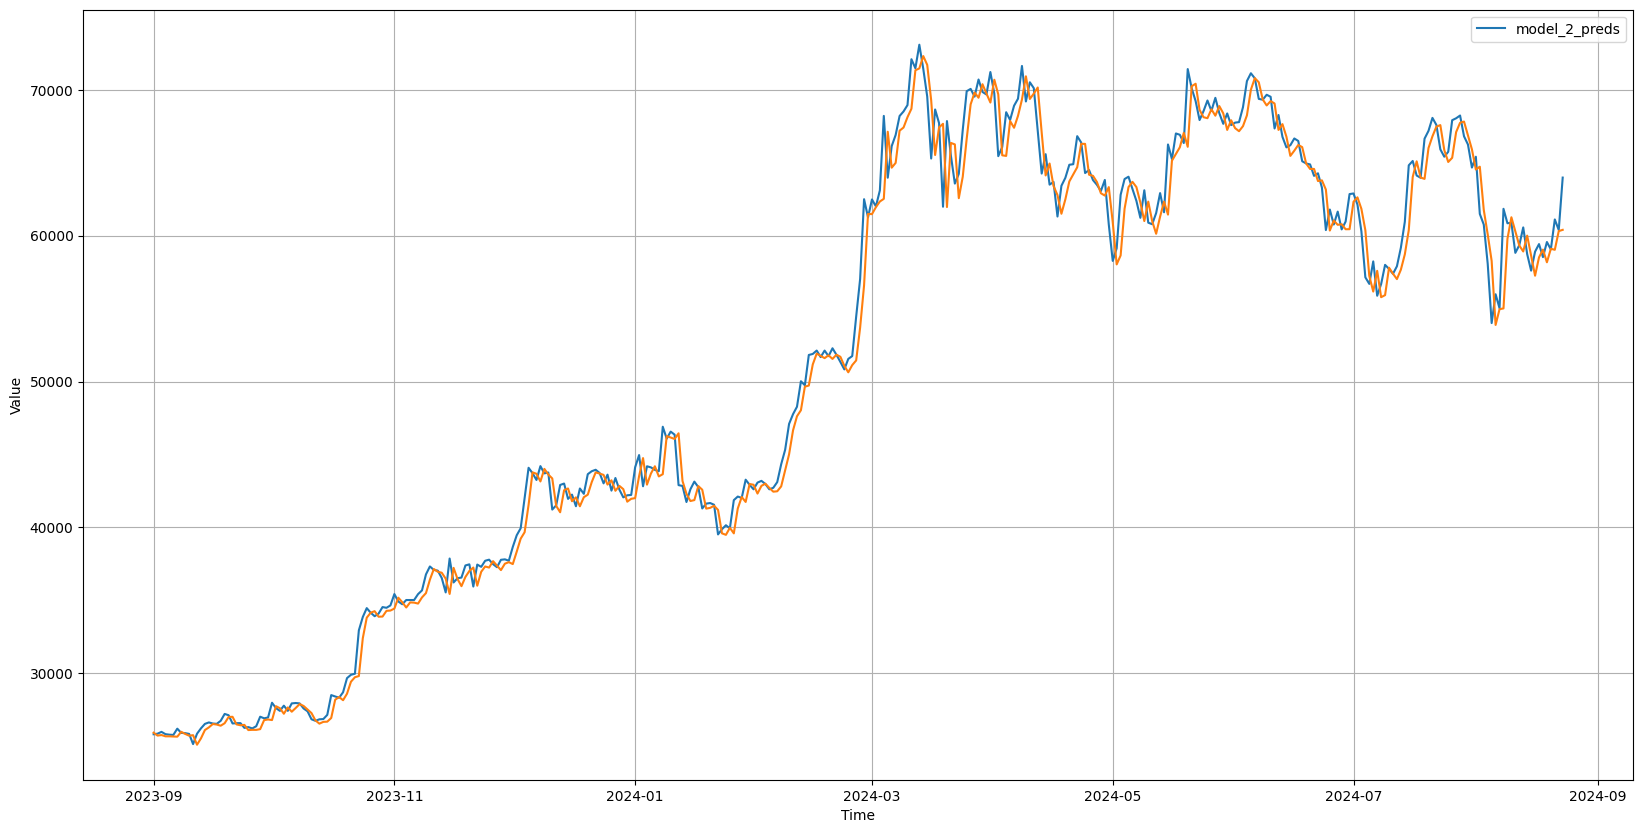

In [238]:
## Ploting the model_2 prediction

plt.figure(figsize=(20,10))
plot_time_series(timesteps= timesteps[1467:], values= bitcoin_price[1467:] ,label="Test")

plot_time_series(timesteps= timesteps[1467:],
                values= forecast,
                label="model_2_preds")

## Model 3:  Same model as Model 2 but 30 days window size and 1 day horizo


In [239]:
HORIZON = 1
WINDOW = 30

all_window, all_label = make_windows(prices, window_size=WINDOW, horizon=HORIZON)

len(all_window), len(all_label), len(prices)

(1795, 1795, 1825)

In [240]:
split, all_window[1].shape, all_label[1].shape

(1460, (30,), (1,))

In [241]:
## Train and test data

train_window , test_window, train_label, test_label = all_windows[:split], all_windows[split:], all_labels[:split], all_labels[split:]

len(train_window), len(test_window), len(train_label), len(test_label)

(1460, 358, 1460, 358)

In [242]:
train_window[:3], train_label[:3]

(array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
          9582.25535778,  9609.78764737,  9716.72190969],
        [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
          9609.78764737,  9716.72190969, 10329.85905157],
        [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
          9716.72190969, 10329.85905157, 10603.09546299]]),
 array([[10329.85905157],
        [10603.09546299],
        [10578.32020957]]))

In [243]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3")

model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_3.fit(x=train_window, y=train_label,
            epochs=100,
            batch_size=32,
            verbose=0,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_3.name")])

In [244]:
model_3.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1242.7267 - mae: 1242.7267 - mse: 2646932.5000


[1537.6173095703125, 1537.6173095703125, 3938182.5]

In [245]:
model_3= tf.keras.models.load_model("model_experiments/model_3.name.keras")
model_3.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 823.8849 - mae: 823.8849 - mse: 1628360.3750


[1093.9278564453125, 1093.9278564453125, 2540868.0]

In [246]:
model_3_forecast = model_3.predict(test_window)
model_3_forecast.shape, tf.squeeze(test_window).shape


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


((358, 1), TensorShape([358, 7]))

In [247]:
model_3_evaluation = evaluation(test_label, model_3_forecast)
model_3_evaluation

{'mae': 1093.9279, 'mse': 2540868.0, 'mape': 2.0599346}

In [248]:
model_2_evaluation

{'mae': 1037.7573, 'mse': 2342178.5, 'mape': 1.9451556}

In [249]:
timesteps.shape, bitcoin_price.shape

((1825,), (1825, 1))

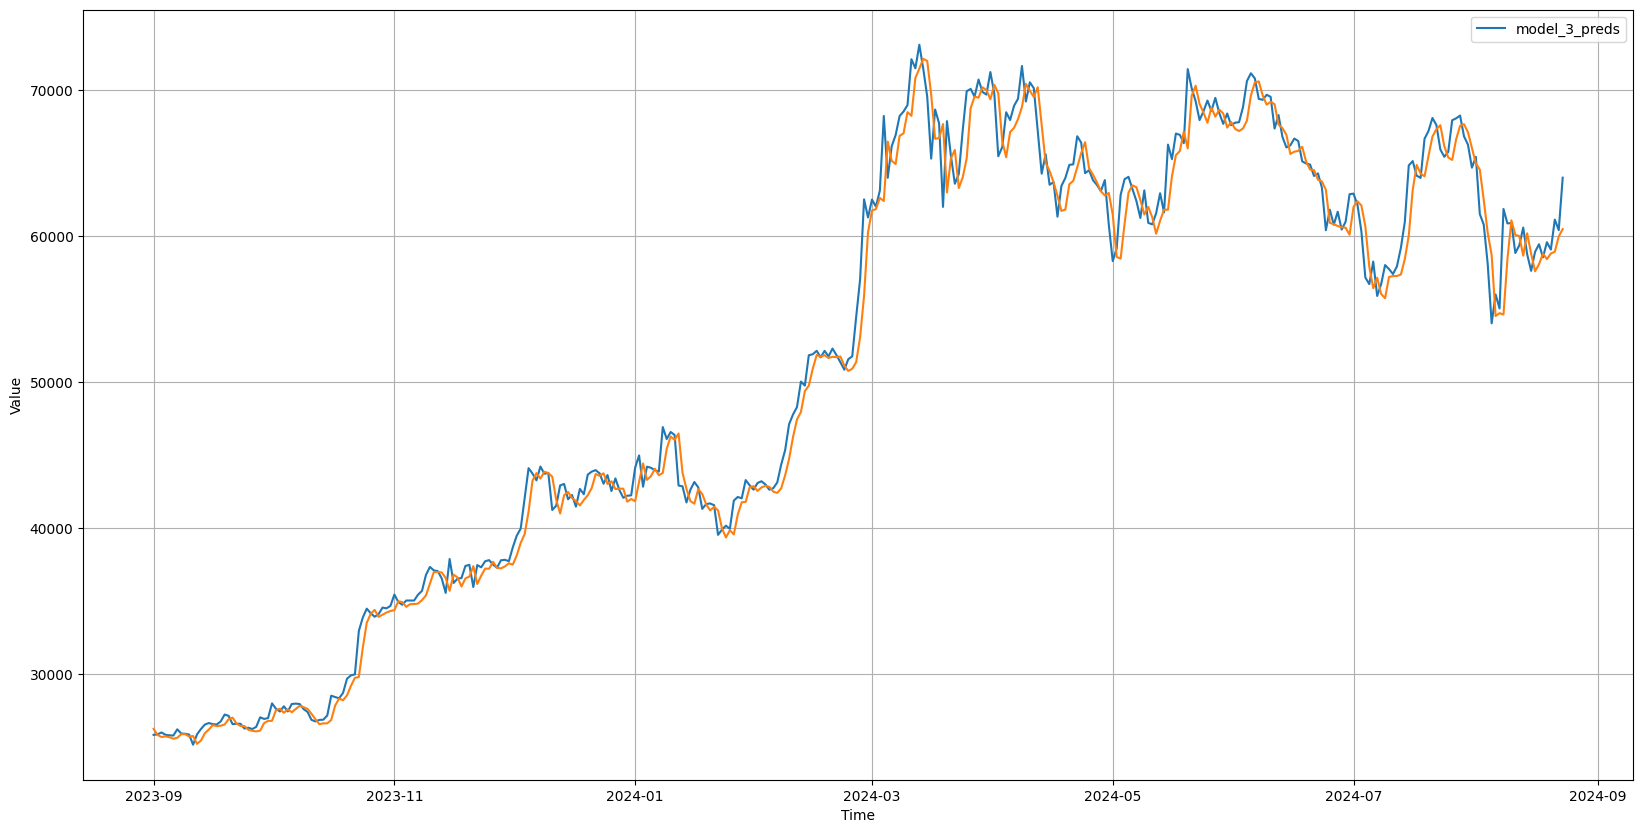

In [250]:
## Ploting the model_3 prediction

plt.figure(figsize=(20,10))
plot_time_series(timesteps= timesteps[1467:], values= bitcoin_price[1467:] ,label="Test")

plot_time_series(timesteps= timesteps[1467:],
                values= model_3_forecast,
                label="model_3_preds")

## Model 4: Window=30 and horizon=7

In [251]:
prices[:3], prices[-3:]

(array([10374.87661724, 10219.41337325,  9759.79152841]),
 array([61109.99, 60386.02, 63979.97]))

In [252]:
bitcoin_price[:3]

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528


In [253]:
HORIZON = 7
WINDOW = 30

In [254]:
import numpy as np

def make_windows(x, window_size=WINDOW, horizon=HORIZON):


  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)


  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_label_window(windowed_array, horizon=horizon)
  return windows, labels

In [255]:
HORIZON = 7
WINDOW = 30

all_window, all_label = make_windows(prices, window_size=30, horizon=7)

len(all_window), len(all_label), len(prices)

(1789, 1789, 1825)

In [256]:
all_window[1], all_label[1]

(array([10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
         9609.78764737,  9716.72190969, 10329.85905157, 10603.09546299,
        10578.32020957, 10574.499542  , 10339.45563157, 10477.09483846,
        10410.18764404, 10322.05760789, 10132.54480456, 10159.72047332,
        10387.51484121, 10346.59919496, 10353.54979822, 10313.44352598,
        10268.65798496, 10208.16581794, 10164.10190487, 10241.60879539,
        10179.86223084, 10006.06533083, 10050.18754113,  9719.39701861,
         8588.42490586,  8439.8461899 ]),
 array([8077.93635444, 8183.56987236, 8208.59598768, 8068.66873829,
        8269.02868158, 8294.74359665, 8361.91923314]))

In [257]:
all_label[1], all_label[1].shape, all_window[1].shape

(array([8077.93635444, 8183.56987236, 8208.59598768, 8068.66873829,
        8269.02868158, 8294.74359665, 8361.91923314]),
 (7,),
 (30,))

In [258]:
train_window , test_window, train_label, test_label = all_windows[split:], all_windows[:split], all_labels[split:], all_labels[:split]

len(train_window), len(test_window), len(train_label), len(test_label)

(358, 1460, 358, 1460)

In [259]:
train_window.shape, train_label.shape, test_window.shape, test_label.shape

((358, 7), (358, 1), (1460, 7), (1460, 1))

In [260]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_4")

model_4.compile(loss="MAE",
                optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_window,
            train_label,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_4.name")])



In [261]:
model_4.evaluate(test_window, test_label)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 797.1755


1023.1727905273438

In [262]:
model_4 = tf.keras.models.load_model("model_experiments/model_4.name.keras")
model_4.evaluate(test_window, test_label)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 797.1755


1023.1727905273438

In [263]:
model_4.predict(test_window)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[ 9595.715,  9884.996,  9670.799, ...,  9462.823,  9794.102,
         9657.629],
       [ 9700.869,  9968.652,  9718.955, ...,  9647.973,  9814.359,
         9784.151],
       [ 9974.391, 10039.581, 10089.441, ..., 10036.98 ,  9988.968,
        10068.818],
       ...,
       [26165.629, 26380.406, 26249.072, ..., 26085.11 , 26232.957,
        26174.568],
       [26462.219, 26755.861, 26404.846, ..., 26292.43 , 26389.09 ,
        26513.693],
       [26684.477, 26872.3  , 27097.008, ..., 26874.5  , 26843.523,
        26888.06 ]], dtype=float32)

In [264]:
model_4_forecast = model_4.predict(test_window)
model_4_forecast.shape, tf.squeeze(test_window).shape

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


((1460, 7), TensorShape([1460, 7]))

In [265]:
model_4_evaluation = evaluation(test_label, model_4_forecast)
model_4_evaluation

{'mae': 1023.17267, 'mse': 2677796.8, 'mape': 3.6816754}

In [266]:
model_3_evaluation, model_2_evaluation

({'mae': 1093.9279, 'mse': 2540868.0, 'mape': 2.0599346},
 {'mae': 1037.7573, 'mse': 2342178.5, 'mape': 1.9451556})

##  Model 5 : Conv1
Conv1 models can be used seq2seq problems.
WINDOW = 7 and HORIZON=1 many to one problem.

In [267]:
HORIZON = 1
WINDOW = 7

In [268]:
all_window, all_label = make_windows(prices, window_size=WINDOW,horizon=HORIZON )
len(all_window), len(all_label), all_window[1].shape, all_label[1].shape

(1818, 1818, (7,), (1,))

In [269]:
split = int(len(prices)  * 0.8)
split


1460

In [270]:
train_window, test_window, train_label, test_label = all_windows[:split], all_windows[split:], all_labels[:split], all_labels[split:]

len(train_window), len(test_window), len(train_label), len(test_label)

(1460, 358, 1460, 358)

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

the input shape is (batch_shape, steps, channels)
steps is here WINDOW size also features
channels is here horizon

An example:
# The inputs are 128-length vectors with 10 timesteps, and the
# batch size is 4.
x = np.random.rand(4, 10, 128)
y = keras.layers.Conv1D(32, 3, activation='relu')(x)
print(y.shape)


In [271]:
x = tf.constant(train_window[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
        9582.25535778,  9609.78764737,  9716.72190969])>

In [272]:
expands_dim_x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expands_dim_x(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[10374.877],
       [10219.413],
       [ 9759.792],
       [ 9493.756],
       [ 9582.255],
       [ 9609.788],
       [ 9716.722]], dtype=float32)>

In [273]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding='causal',  activation="relu"),
  layers.Dense(HORIZON)
], name= "model_5")

model_5.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_window,
          train_label,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(test_window, test_label),
          callbacks=[checkpoint(model_name="model_5.name")])



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 21012.3066 - val_loss: 18989.5898
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6341.1157 - val_loss: 4799.4497
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2713.7627 - val_loss: 2052.8838
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1534.5094 - val_loss: 1762.9039
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1329.8281 - val_loss: 2002.0638
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1270.9419 - val_loss: 1749.8291
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1203.5210 - val_loss: 1730.4902
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1186.7665 - val_loss: 1723.3851
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1178.8627 - val_loss: 1704.4148
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1172.4716 - val_loss: 1693.5162
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1168.9935 - val_loss: 1686

In [274]:
model_5.summary()

Model: "model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_724 (Dense)                    │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [275]:
model_5.evaluate(test_window, test_label)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 797.7969


1070.2801513671875

In [276]:
model_5_preds = model_5.predict(test_window)
model_5_preds[0]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[26365.727]], dtype=float32)

In [277]:
model_5_evaluation = evaluation(test_label, model_5_preds)
model_5_evaluation

{'mae': 1070.2802, 'mse': 2449189.2, 'mape': 2.0076678}

In [278]:
model_2_evaluation, model_3_evaluation, model_4_evaluation

({'mae': 1037.7573, 'mse': 2342178.5, 'mape': 1.9451556},
 {'mae': 1093.9279, 'mse': 2540868.0, 'mape': 2.0599346},
 {'mae': 1023.17267, 'mse': 2677796.8, 'mape': 3.6816754})

## Model 6: RNN (LTSM)
Recurrent neursl network is used to model sequential time series data.
One of layer in RNN is https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
LSTM: Lost Short -Term Memory

In [279]:
WINDOW

7

In [280]:
def expand_dims(x):
    return tf.expand_dims(x, axis=1)

@tf.keras.utils.register_keras_serializable()
class ExpandDimsLayer(layers.Layer):
    def call(self, inputs):
        return expand_dims(inputs)

inputs = layers.Input(shape=(WINDOW,))
x = ExpandDimsLayer()(inputs)  # Wrap tf.expand_dims in a custom layer
x.shape
x = layers.LSTM(128, activation="relu")(x)
print(x.shape)
outputs = layers.Dense(HORIZON)(x)
model_6 = tf.keras.Model(inputs, outputs, name="model_6")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(train_window,
            train_label,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_6.name")])

(None, 128)
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 21712.4336 - val_loss: 30299.3809
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13687.1260 - val_loss: 15813.3564
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5906.7373 - val_loss: 1808.8151
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1913.7178 - val_loss: 2172.5249
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1185.1570 - val_loss: 2026.8491
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1123.3119 - val_loss: 1543.0333
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1039.4581 - val_loss: 1513.7252
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1028.1823 - val_loss: 1497.4165
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1019.8682 - val_loss: 1485.7039
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1019.7003 - val_loss: 1499.8953
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1015.4855 -

In [281]:
# tf.random.set_seed(42)

# def expand_dims(x):
#     import tensorflow as tf  # Import TensorFlow inside the function
#     return tf.expand_dims(x, axis=1)

# inputs = layers.Input(shape=(WINDOW,))
# x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1), output_shape=(1, WINDOW))(inputs)

# #print(x.shape)
# x = layers.LSTM(128, activation="relu")(x)
# print(x.shape)
# outputs = layers.Dense(HORIZON)(x)
# model_6 = tf.keras.Model(inputs, outputs, name="model_6")

# model_6.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam())

# model_6.fit(train_window,
#             train_label,
#             epochs=100,
#             verbose=1,
#             batch_size=128,
#             validation_data=(test_window, test_label),
#             callbacks=[checkpoint(model_name="model_6.name")])




In [282]:
model_6.summary()

Model: "model_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ expand_dims_layer_1                  │ (None, 1, 7)                │               0 │
│ (ExpandDimsLayer)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_725 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,285 (817.52 KB)

 Trainable params: 69,761 (272.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 139,524 (545.02 KB)

In [283]:
model_6.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 790.1321


1081.840087890625

In [284]:
model_6 = tf.keras.models.load_model("model_experiments/model_6.name.keras")
model_6.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 790.1321


1081.840087890625

In [285]:
model_6_preds = model_6.predict(test_window)
model_6_preds.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


(358, 1)

In [286]:
model_6_evalaation= evaluation(test_label, model_6_preds)
model_6_evalaation

{'mae': 1081.8402, 'mse': 2547780.8, 'mape': 2.0206444}

In [287]:
model_5_evaluation, model_2_evaluation, model_3_evaluation, model_4_evaluation

({'mae': 1070.2802, 'mse': 2449189.2, 'mape': 2.0076678},
 {'mae': 1037.7573, 'mse': 2342178.5, 'mape': 1.9451556},
 {'mae': 1093.9279, 'mse': 2540868.0, 'mape': 2.0599346},
 {'mae': 1023.17267, 'mse': 2677796.8, 'mape': 3.6816754})

## Model 7: A multivariate time series with Bitcoin block reward size.
The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block.

The reward size is gotten from https://cryptoanswers.com/faq/bitcoin-halving-dates-history/

In [288]:
block_reward_1 = 50 # start date is 3 January 2009
block_reward_2 = 25 # 2012 Nov 28th
block_reward_3 = 12.5 #2016 July 9 th
block_reward_4 = 6.25  # 2020 May 11th
block_reward_5 = 3.125  #2024 April 20th
block_reward_6 = 1.56  #2028 April 20th

In [289]:
block_reward_3_time = np.datetime64("2016-07-09")
block_reward_4_time = np.datetime64("2020-05-11")
block_reward_5_time = np.datetime64("2024-04-20")

In [290]:
bitcoin_price.head()


,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [291]:
bitcoin_price.index[0]

Timestamp('2019-08-26 00:00:00')

In [292]:
block_reward_4_days = (block_reward_4_time - bitcoin_price.index[0]).days
block_reward_5_days = (block_reward_5_time - bitcoin_price.index[0]).days
block_reward_4_days, block_reward_5_days

(259, 1699)

In [293]:
bitcoin_price_copy_block = bitcoin_price.copy()
bitcoin_price_copy_block["block_reward"] = None
bitcoin_price_copy_block.index = bitcoin_price_copy_block.index.astype("datetime64[ns]")
bitcoin_price_copy_block.head()


,price,block_reward
Start,,
2019-08-26,10374.876617,None
2019-08-27,10219.413373,None
2019-08-28,9759.791528,None
2019-08-29,9493.755389,None
2019-08-30,9582.255358,None


In [294]:
index_location_4 = bitcoin_price_copy_block.index.get_loc(block_reward_4_time)
#print(index_location_4)
index_location_5 = bitcoin_price_copy_block.index.get_loc(block_reward_5_time)
#print(index_location_5)
bitcoin_price_copy_block.iloc[:index_location_4, -1] = block_reward_4
bitcoin_price_copy_block.iloc[index_location_4 :index_location_5 , -1] = block_reward_5
bitcoin_price_copy_block.iloc[index_location_5 :, -1] = block_reward_6
bitcoin_price_copy_block

,price,block_reward
Start,,
2019-08-26,10374.876617,6.25
2019-08-27,10219.413373,6.25
2019-08-28,9759.791528,6.25
2019-08-29,9493.755389,6.25
2019-08-30,9582.255358,6.25
...,...,...
2024-08-19,59562.710000,1.56
2024-08-20,59056.010000,1.56
2024-08-21,61109.990000,1.56


<Axes: xlabel='Start'>

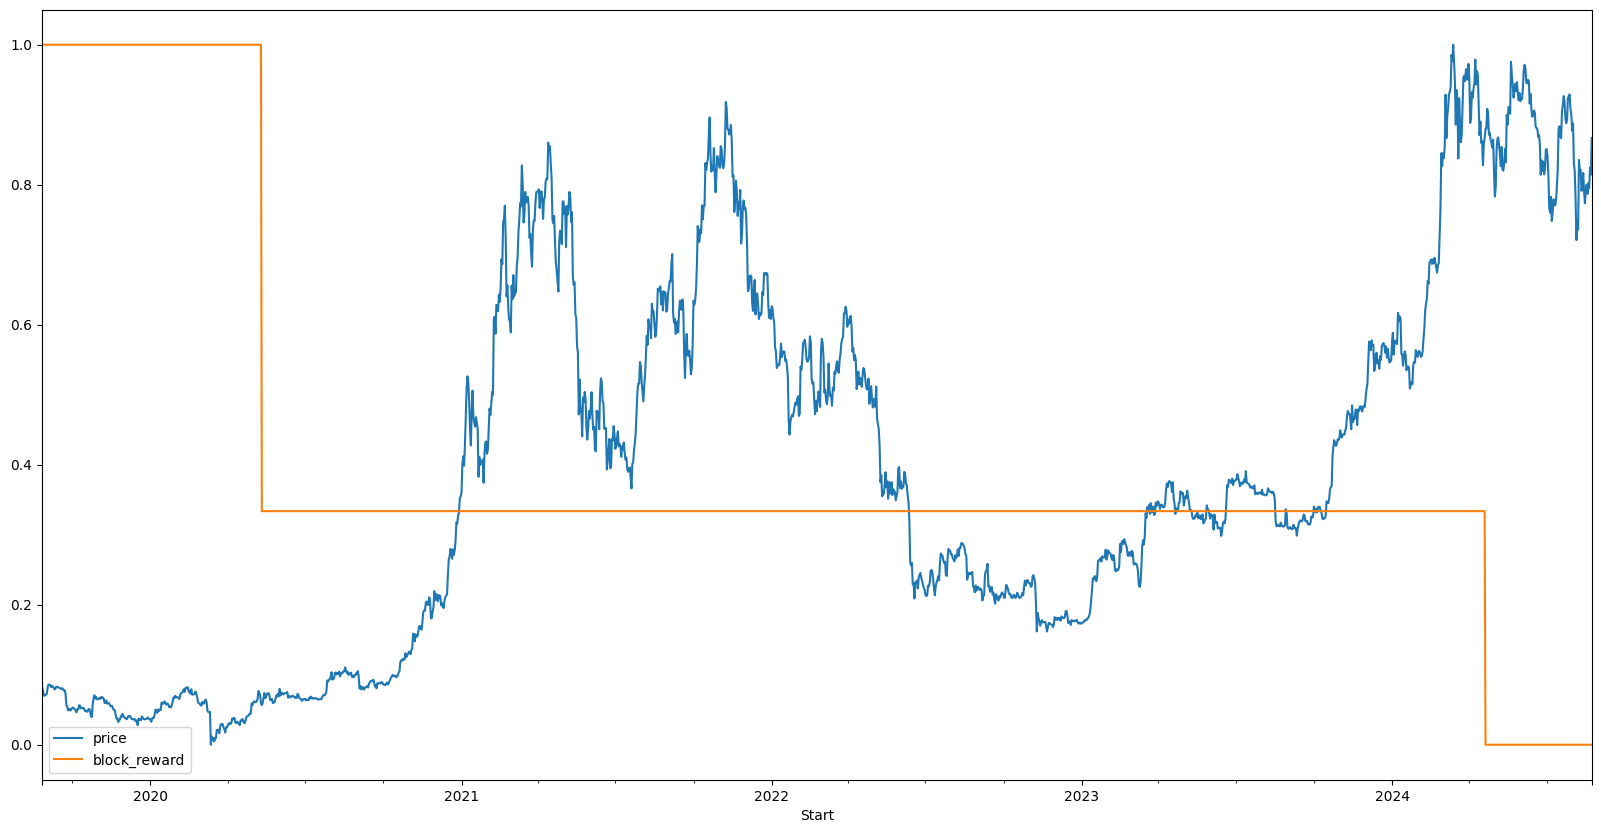

In [295]:
from sklearn.preprocessing import minmax_scale

price_df = pd.DataFrame(minmax_scale(bitcoin_price_copy_block[["price", "block_reward"]]),
                        columns =bitcoin_price_copy_block.columns,
                        index=bitcoin_price_copy_block.index )

price_df.plot(figsize=(20,10))

In [296]:
HORIZON = 1
WINDOW = 7

bitcoin_block_windowed = bitcoin_price_copy_block.copy()

for i in range(WINDOW):
  bitcoin_block_windowed[f"Price+{i+1}"] = bitcoin_price_copy_block["price"].shift(periods=i+1)

bitcoin_block_windowed.head(10)



,price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,,
2019-08-26,10374.876617,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-27,10219.413373,6.25,10374.876617,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-28,9759.791528,6.25,10219.413373,10374.876617,NaN,NaN,NaN,NaN,NaN
2019-08-29,9493.755389,6.25,9759.791528,10219.413373,10374.876617,NaN,NaN,NaN,NaN
2019-08-30,9582.255358,6.25,9493.755389,9759.791528,10219.413373,10374.876617,NaN,NaN,NaN
2019-08-31,9609.787647,6.25,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617,NaN,NaN
2019-09-01,9716.721910,6.25,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617,NaN
2019-09-02,10329.859052,6.25,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617
2019-09-03,10603.095463,6.25,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373


In [297]:
X = bitcoin_block_windowed.dropna().drop("price", axis=1).astype(np.float32)
y = bitcoin_block_windowed.dropna()["price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,
2019-09-02,6.25,9716.721680,9609.788086,9582.254883,9493.755859,9759.791992,10219.413086,10374.876953
2019-09-03,6.25,10329.859375,9716.721680,9609.788086,9582.254883,9493.755859,9759.791992,10219.413086
2019-09-04,6.25,10603.095703,10329.859375,9716.721680,9609.788086,9582.254883,9493.755859,9759.791992
2019-09-05,6.25,10578.320312,10603.095703,10329.859375,9716.721680,9609.788086,9582.254883,9493.755859
2019-09-06,6.25,10574.500000,10578.320312,10603.095703,10329.859375,9716.721680,9609.788086,9582.254883


In [298]:
y.head()

,price
Start,
2019-09-02,10329.859375
2019-09-03,10603.095703
2019-09-04,10578.320312
2019-09-05,10574.500000
2019-09-06,10339.456055


In [299]:
split = int(len(X) * 0.8)
split

1454

In [300]:
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1454, 1454, 364, 364)

In [301]:
X_train.shape

(1454, 8)

In [302]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    layers.Dense(128, activation= "relu"),
    layers.Dense(HORIZON)], name = "model_7")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_7.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[checkpoint(model_name=model_7.name)])

In [303]:
model_7.summary()

Model: "model_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_726 (Dense)                    │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_727 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,845 (15.02 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,564 (10.02 KB)

In [304]:
model_7 = tf.keras.models.load_model("model_experiments/model_7.keras")
model_7.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 716.3608


988.9791259765625

In [305]:
model_7_preds = model_7.predict(X_test)
model_7_preds[:5]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[26071.695],
       [26073.71 ],
       [26051.121],
       [26132.89 ],
       [27383.113]], dtype=float32)

In [306]:
model_7_evaluation = evaluation(model_7_preds,y_test)
model_7_evaluation

{'mae': 988.97925, 'mse': 2226236.8, 'mape': 1.8715281}

In [307]:
 model_2_evaluation, model_3_evaluation, model_4_evaluation, model_5_evaluation, model_6_evalaation

({'mae': 1037.7573, 'mse': 2342178.5, 'mape': 1.9451556},
 {'mae': 1093.9279, 'mse': 2540868.0, 'mape': 2.0599346},
 {'mae': 1023.17267, 'mse': 2677796.8, 'mape': 3.6816754},
 {'mae': 1070.2802, 'mse': 2449189.2, 'mape': 2.0076678},
 {'mae': 1081.8402, 'mse': 2547780.8, 'mape': 2.0206444})

Model 8 : N-BEATS Algorithm: https://arxiv.org/pdf/1905.10437



In [308]:
## Create a layer from Figure-1 in the paper

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
              input_size: int,
              theta_size: int,
              horizon: int,
              n_neurons: int,
              n_layers: int,
              **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size= theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x= inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size] , theta[:, -self.horizon :]
    return backcast, forecast




In [309]:
WINDOW_SIZE = 7
HORIZON = 1

In [310]:
any_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) +1, axis=0)

In [311]:
any_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [312]:
nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                 theta_size = WINDOW_SIZE+ HORIZON,
                                 horizon=HORIZON,
                                 n_neurons=128,
                                 n_layers =4
                                 )


In [313]:
backcast, forecast = nbeats_block_layer(any_inputs)
backcast, forecast

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[ 0.77249503, -0.94288605, -0.5626644 ,  0.0149357 ,  0.21750061,
         -0.626326  , -0.42870152]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.0877859]], dtype=float32)>)

In [314]:
print(bitcoin_price.columns)

Index(['price'], dtype='object')


In [315]:
bitcoin_price.head()

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [316]:
bitcoin_price_8 = bitcoin_price.copy()

In [317]:
for i in range(WINDOW_SIZE):
  bitcoin_price_8[f"Price+{i+1}"] = bitcoin_price_8["price"].shift(periods=i+1)

bitcoin_price_8.head()

,price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,
2019-08-26,10374.876617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-27,10219.413373,10374.876617,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-28,9759.791528,10219.413373,10374.876617,NaN,NaN,NaN,NaN,NaN
2019-08-29,9493.755389,9759.791528,10219.413373,10374.876617,NaN,NaN,NaN,NaN
2019-08-30,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617,NaN,NaN,NaN


In [318]:
bitcoin_price_8  = bitcoin_price_8.dropna()

In [319]:
bitcoin_price_8.head()

,price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,
2019-09-02,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373,10374.876617
2019-09-03,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528,10219.413373
2019-09-04,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389,9759.791528
2019-09-05,10574.499542,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358,9493.755389
2019-09-06,10339.455632,10574.499542,10578.320210,10603.095463,10329.859052,9716.721910,9609.787647,9582.255358


In [320]:
split_size = int(len(bitcoin_price_8) * 0.8)
split_size, len(bitcoin_price_8)

(1454, 1818)

In [321]:
X = bitcoin_price_8.drop("price", axis=1)
y = bitcoin_price_8["price"]


In [322]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1454, 1454, 364, 364)

In [323]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train))
train_label_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test))
test_label_dataset = tf.data.Dataset.from_tensor_slices(y_test)



In [324]:
train_dataset = tf.data.Dataset.zip((train_dataset, train_label_dataset))
test_dataset = tf.data.Dataset.zip((test_dataset, test_label_dataset))

In [325]:
BATCH_SIZE =1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [326]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS =30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

working on double residual stacking and use :
tf.keras.layers.subtract(input):  subtracts list of input tensors from each other
tf.keras.layers.add(inputs);  subtracts list of input tensors from each other

In [327]:
tensor_1 = tf.range(10) +10
tensor_1

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>

In [328]:
tensor_2 = tf.range(10)
tensor_2

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [329]:
result_1 = tf.keras.layers.subtract([tensor_1, tensor_2])
result_2 = tf.keras.layers.add([tensor_1, tensor_2])
result_1, result_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

In [330]:
result_1.numpy(), result_2.numpy()

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32))

In [331]:
tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons= N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock"
                                 )

In [332]:
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

backcast, forecast = nbeats_block_layer(stack_input)

In [333]:
residual = layers.subtract([stack_input, backcast], name="subtract")

In [334]:
for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeastBlock_{i}")(residual)

  residual = layers.subtract([residual,backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast,block_forecast], name=f"add_{i}")


In [335]:

model_8 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_8")

model_8.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

model_8.fit(train_dataset,
            epochs=N_EPOCHS,
            verbose=0,
            validation_data=test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 123: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 223: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [336]:
model_8.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 985.8781 - mae: 985.8781 - mse: 2205689.2500


[985.8781127929688, 985.8781127929688, 2205689.25]

In [337]:
model_8_preds = model_8.predict(test_dataset)
model_8_preds[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[26088.977],
       [26037.135],
       [26056.527],
       [26137.244],
       [27399.402]], dtype=float32)

In [338]:
model_8_results = evaluation(model_8_preds, y_test)
model_8_results

{'mae': 985.8781, 'mse': 2205689.2, 'mape': 1.8687352}

In [347]:
model_8.summary()

Model: "model_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ stack_input (InputLayer)  │ (None, 7)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ InitialBlock              │ [(None, 7), (None, 1)] │        796,168 │ stack_input[0][0]      │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract (Subtract)       │ (None, 7)              │              0 │ stack_input[0][0],     │
│                           │                        │                │ InitialBlock[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_0             │ [(None, 7), (None, 1)] │        796,168 │ subtract[0][0]         │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_0 (Subtract)     │ (None, 7)              │              0 │ subtract[0][0],        │
│                           │                        │                │ NBeastBlock_0[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_1             │ [(None, 7), (None, 1)] │        796,168 │ subtract_0[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_1 (Subtract)     │ (None, 7)              │              0 │ subtract_0[0][0],      │
│                           │                        │                │ NBeastBlock_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_2             │ [(None, 7), (None, 1)] │        796,168 │ subtract_1[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_2 (Subtract)     │ (None, 7)              │              0 │ subtract_1[0][0],      │
│                           │                        │                │ NBeastBlock_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_3             │ [(None, 7), (None, 1)] │        796,168 │ subtract_2[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_3 (Subtract)     │ (None, 7)              │              0 │ subtract_2[0][0],      │
│                           │                        │                │ NBeastBlock_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_4             │ [(None, 7), (None, 1)] │        796,168 │ subtract_3[0][0]       │
│ (NBeatsBlock)             │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract_4 (Subtract)     │ (None, 7)              │              0 │ subtract_3[0][0],      │
│                           │                        │                │ NBeastBlock_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ NBeastBlock_5        

 Total params: 71,655,122 (273.34 MB)

 Trainable params: 23,885,040 (91.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,770,082 (182.23 MB)